**Importing Libraries**

In [22]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler

**Reading Dataset**

In [23]:
data=pd.read_csv('weather_2020-11.csv')
df=pd.read_csv('weather_2020-11.csv')

**Display Top Five Rows of The Dataset.**

In [24]:
data.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


**Find Shape of The Dataset.**

In [25]:
data.shape
print("Number of column",data.shape[0])
print("Number Rows",data.shape[1])

Number of column 8364
Number Rows 3


**Getting Information from Dataset.**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time            8364 non-null   object
 1   ParameterName   8364 non-null   object
 2   ParameterValue  6229 non-null   object
dtypes: object(3)
memory usage: 196.2+ KB


**Check Null Values in Dataset.**

In [27]:
data.isnull()

,Time,ParameterName,ParameterValue
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
8359,False,False,False
8360,False,False,True
8361,False,False,True
8362,False,False,False


In [28]:
data.isnull().sum()

Time                 0
ParameterName        0
ParameterValue    2135
dtype: int64

**Checking Duplicates Data and Droping Them.**

In [29]:
cleaned_df = data.dropna()
print(cleaned_df)

                      Time ParameterName ParameterValue
0     2020-11-01T00:00:00Z   TA_PT1H_AVG            6.5
1     2020-11-01T00:00:00Z   TA_PT1H_MAX            6.6
2     2020-11-01T00:00:00Z   TA_PT1H_MIN            6.3
3     2020-11-01T00:00:00Z   RH_PT1H_AVG           95.0
4     2020-11-01T00:00:00Z   WS_PT1H_AVG            3.3
...                    ...           ...            ...
8356  2020-11-30T00:00:00Z   WS_PT1H_AVG            1.7
8357  2020-11-30T00:00:00Z   WS_PT1H_MAX            2.2
8358  2020-11-30T00:00:00Z   WS_PT1H_MIN            1.1
8359  2020-11-30T00:00:00Z   WD_PT1H_AVG          138.0
8362  2020-11-30T00:00:00Z   PA_PT1H_AVG         1026.9

[6229 rows x 3 columns]


In [30]:
data_dup=data.duplicated().any()
print(data_dup)

False


In [31]:
data.dropna(subset=['ParameterValue'], inplace=True)

In [32]:
data.isnull().sum()

Time              0
ParameterName     0
ParameterValue    0
dtype: int64

**Get Overall Statistics of Dataset.**

In [33]:
data.describe()

,Time,ParameterName,ParameterValue
count,6229,6229,6229
unique,697,10,807
top,2020-11-16T15:00:00Z,TA_PT1H_AVG,3.0
freq,10,697,90


In [34]:
data.describe(include='all')

,Time,ParameterName,ParameterValue
count,6229,6229,6229
unique,697,10,807
top,2020-11-16T15:00:00Z,TA_PT1H_AVG,3.0
freq,10,697,90


**Calculate the average values for the parameters**

In [35]:
# Convert 'ParameterValue' column to numeric, coerce errors to NaN
data['ParameterValue'] = pd.to_numeric(data['ParameterValue'], errors='coerce')

# Filter rows where ParameterName contains the specified attributes
filtered_data_TA = data[data['ParameterName'] == 'TA_PT1H_AVG']
filtered_data_RH = data[data['ParameterName'] == 'RH_PT1H_AVG']
filtered_data_WS = data[data['ParameterName'] == 'WS_PT1H_AVG']
filtered_data_WD = data[data['ParameterName'] == 'WD_PT1H_AVG']
filtered_data_PRA = data[data['ParameterName'] == 'PRA_PT1H_ACC']
filtered_data_PRI = data[data['ParameterName'] == 'PRI_PT1H_MAX']
filtered_data_PA = data[data['ParameterName'] == 'PA_PT1H_AVG']

# Calculate the average values for each attribute
average_TA = filtered_data_TA['ParameterValue'].mean()
average_RH = filtered_data_RH['ParameterValue'].mean()
average_WS = filtered_data_WS['ParameterValue'].mean()
average_WD = filtered_data_WD['ParameterValue'].mean()
average_PRA = filtered_data_PRA['ParameterValue'].mean()
average_PRI = filtered_data_PRI['ParameterValue'].mean()
average_PA = filtered_data_PA['ParameterValue'].mean()

# Create a DataFrame for the average values
average_table = pd.DataFrame({
    'Attribute': ['TA_PT1H_AVG', 'RH_PT1H_AVG', 'WS_PT1H_AVG', 'WD_PT1H_AVG', 'PRA_PT1H_ACC', 'PRI_PT1H_MAX', 'PA_PT1H_AVG'],
    'Average Value': [average_TA, average_RH, average_WS, average_WD, average_PRA, average_PRI, average_PA]
})

# Print the average table
print(average_table)


      Attribute  Average Value
0   TA_PT1H_AVG       2.740029
1   RH_PT1H_AVG      87.901387
2   WS_PT1H_AVG       3.900717
3   WD_PT1H_AVG     208.793400
4  PRA_PT1H_ACC            NaN
5  PRI_PT1H_MAX            NaN
6   PA_PT1H_AVG    1012.634146


**Descriptive statistics ususing NymPy**

In [38]:


# Convert 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Filter rows for each parameter
parameters = ['TA_PT1H_AVG', 'TA_PT1H_MAX', 'TA_PT1H_MIN', 'RH_PT1H_AVG', 'WS_PT1H_AVG', 'WS_PT1H_MAX', 'WS_PT1H_MIN', 'WD_PT1H_AVG', 'PA_PT1H_AVG', 'WAWA_PT1H_RANK']

for parameter in parameters:
    filtered_data = data[data['ParameterName'] == parameter]

    # Calculate minimum, maximum, and median values
    minimum_value = np.min(filtered_data['ParameterValue'])
    maximum_value = np.max(filtered_data['ParameterValue'])
    median_value = np.median(filtered_data['ParameterValue'])

    print("Parameter:", parameter)
    print("Minimum value:", minimum_value)
    print("Maximum value:", maximum_value)
    print("Median value:", median_value)

    # Find the hour with the highest value
    hour_with_highest_value = filtered_data.loc[filtered_data['ParameterValue'].idxmax()]['Time'].hour
    print("Hour with highest value:", hour_with_highest_value)
    print()


Parameter: TA_PT1H_AVG
Minimum value: -8.4
Maximum value: 10.9
Median value: 2.8
Hour with highest value: 6

Parameter: TA_PT1H_MAX
Minimum value: -7.8
Maximum value: 11.1
Median value: 3.0
Hour with highest value: 6

Parameter: TA_PT1H_MIN
Minimum value: -9.1
Maximum value: 10.9
Median value: 2.5
Hour with highest value: 6

Parameter: RH_PT1H_AVG
Minimum value: 61.0
Maximum value: 100.0
Median value: nan
Hour with highest value: 13

Parameter: WS_PT1H_AVG
Minimum value: 0.4
Maximum value: 10.3
Median value: 3.7
Hour with highest value: 12

Parameter: WS_PT1H_MAX
Minimum value: 0.7
Maximum value: 12.3
Median value: 4.4
Hour with highest value: 14

Parameter: WS_PT1H_MIN
Minimum value: 0.1
Maximum value: 9.5
Median value: 3.1
Hour with highest value: 12

Parameter: WD_PT1H_AVG
Minimum value: 4.0
Maximum value: 359.0
Median value: 188.0
Hour with highest value: 10

Parameter: PA_PT1H_AVG
Minimum value: 977.3
Maximum value: 1032.6
Median value: 1013.7
Hour with highest value: 18

Paramete

KeyError: nan

In [39]:


# Get unique attributes (parameters) in the 'ParameterName' column
unique_parameters = data['ParameterName'].unique()

# Print the unique attributes
print("Unique Attributes (Parameters):")
for parameter in unique_parameters:
    print(parameter)


Unique Attributes (Parameters):
TA_PT1H_AVG
TA_PT1H_MAX
TA_PT1H_MIN
RH_PT1H_AVG
WS_PT1H_AVG
WS_PT1H_MAX
WS_PT1H_MIN
WD_PT1H_AVG
PA_PT1H_AVG
WAWA_PT1H_RANK


**Plots to visualize the trends of the parameters**

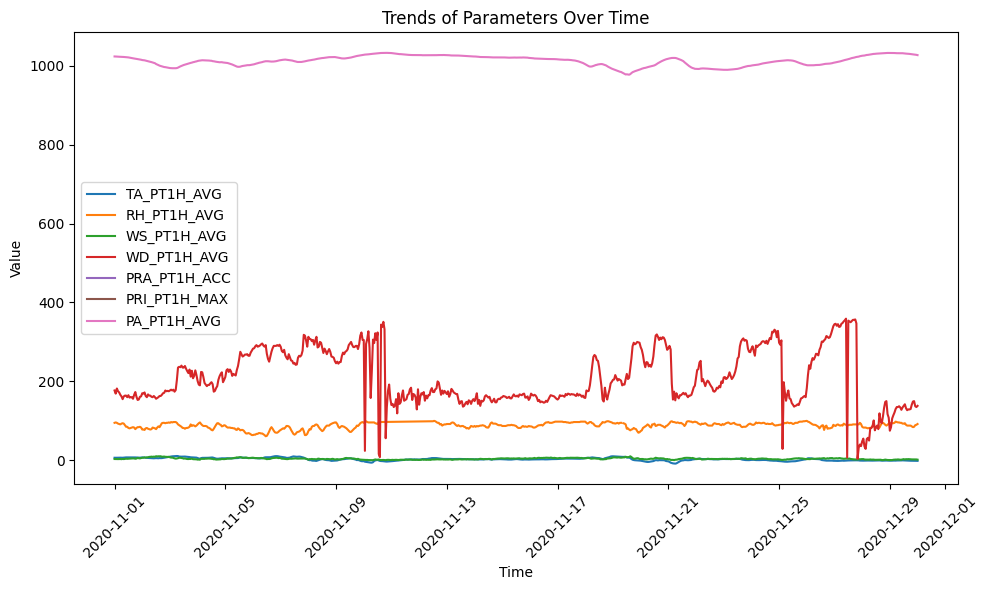

In [40]:

# Convert 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Filter rows for each parameter
filtered_data_TA = data[data['ParameterName'] == 'TA_PT1H_AVG']
filtered_data_RH = data[data['ParameterName'] == 'RH_PT1H_AVG']
filtered_data_WS = data[data['ParameterName'] == 'WS_PT1H_AVG']
filtered_data_WD = data[data['ParameterName'] == 'WD_PT1H_AVG']
filtered_data_PRA = data[data['ParameterName'] == 'PRA_PT1H_ACC']
filtered_data_PRI = data[data['ParameterName'] == 'PRI_PT1H_MAX']
filtered_data_PA = data[data['ParameterName'] == 'PA_PT1H_AVG']

# Plot each parameter
plt.figure(figsize=(10, 6))

plt.plot(filtered_data_TA['Time'], filtered_data_TA['ParameterValue'], label='TA_PT1H_AVG')
plt.plot(filtered_data_RH['Time'], filtered_data_RH['ParameterValue'], label='RH_PT1H_AVG')
plt.plot(filtered_data_WS['Time'], filtered_data_WS['ParameterValue'], label='WS_PT1H_AVG')
plt.plot(filtered_data_WD['Time'], filtered_data_WD['ParameterValue'], label='WD_PT1H_AVG')
plt.plot(filtered_data_PRA['Time'], filtered_data_PRA['ParameterValue'], label='PRA_PT1H_ACC')
plt.plot(filtered_data_PRI['Time'], filtered_data_PRI['ParameterValue'], label='PRI_PT1H_MAX')
plt.plot(filtered_data_PA['Time'], filtered_data_PA['ParameterValue'], label='PA_PT1H_AVG')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Trends of Parameters Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Visualizing the dataset**

In [41]:
cate_val=[]
cont_val=[]

for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
      cont_val.append(column)




In [42]:
cate_val

['ParameterName']

In [43]:
cont_val

['Time', 'ParameterValue']

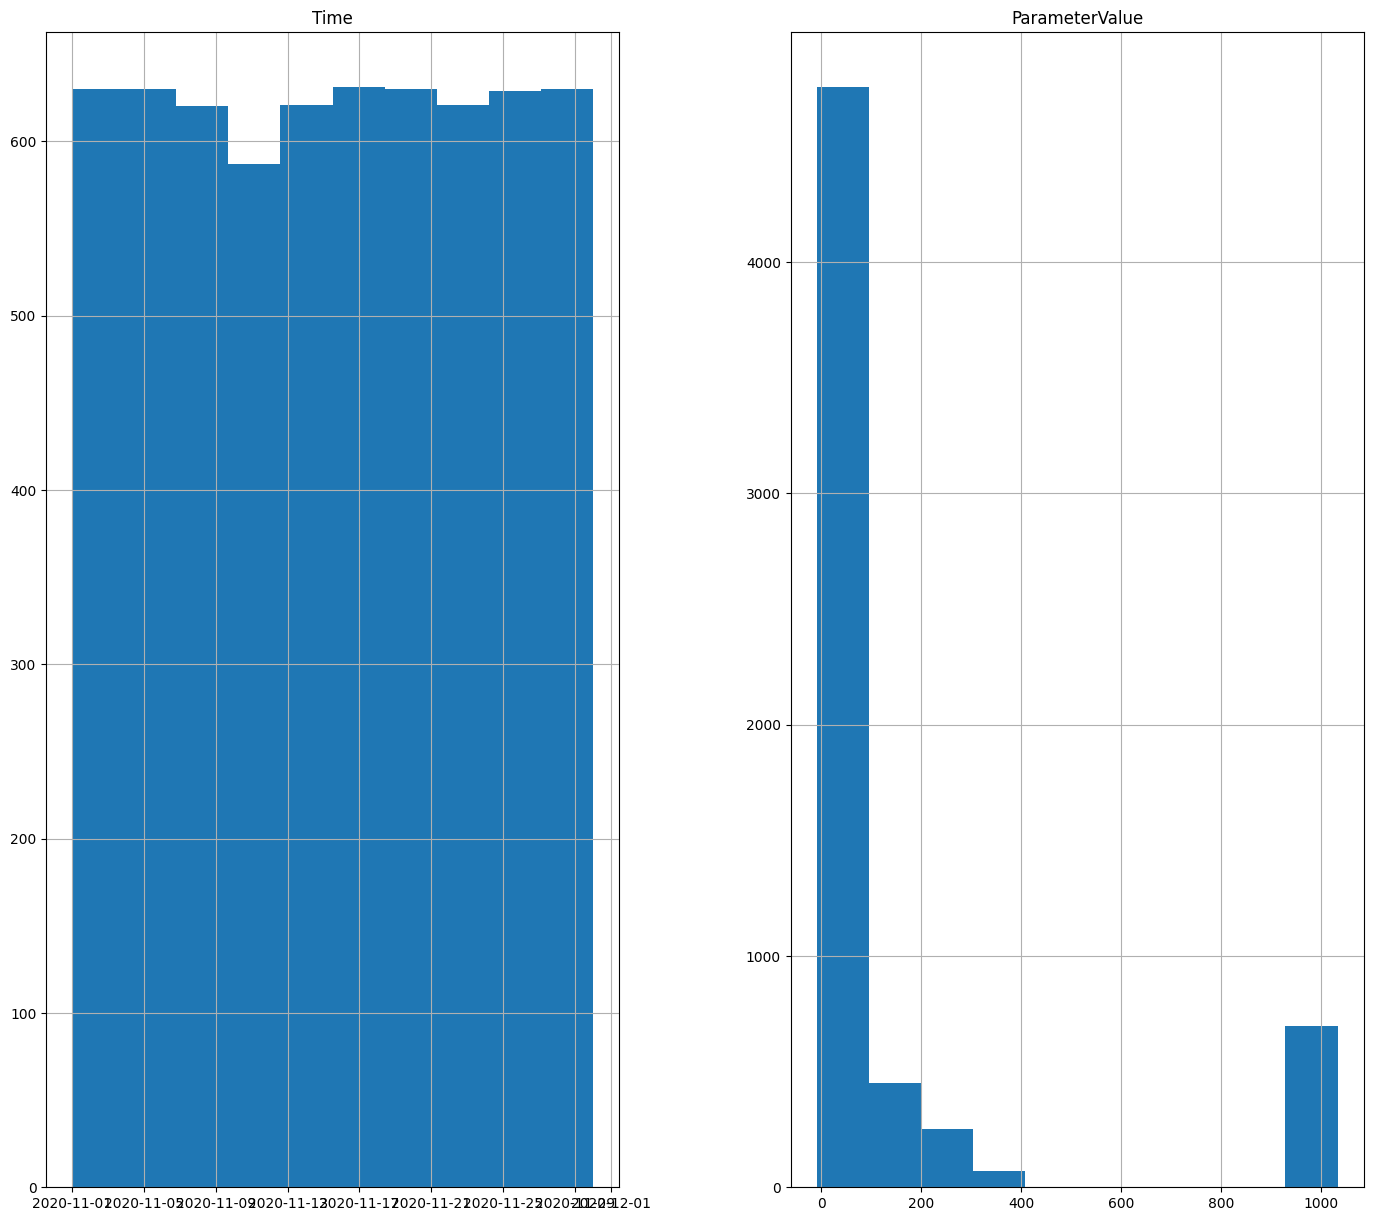

<Figure size 640x480 with 0 Axes>

In [44]:
data.hist(cont_val,figsize=(17,15))
plt.show()
plt.tight_layout()
plt.savefig('Histogram.jpg')